In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Temperature_Prediction.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

Here we have 7752 rows and 25 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

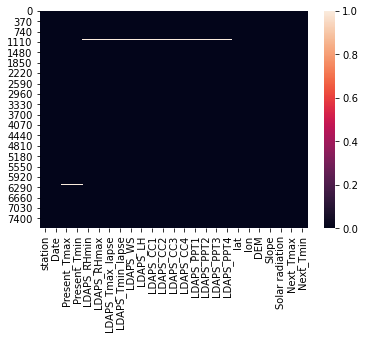

In [8]:
sns.heatmap(df.isnull())

In [9]:
from sklearn.impute import SimpleImputer
list1=['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Next_Tmax', 'Next_Tmin']
for val in list1:
    imp=SimpleImputer(strategy="most_frequent")
    df[val]=imp.fit_transform(df[val].values.reshape(-1,1))

In [10]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Feature Engineering

In [11]:
df["Date"]=pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df.drop("Date",axis=1,inplace=True)

In [12]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [13]:
print(df["Present_Tmax"].max())
print(df["Present_Tmax"].min())

37.6
20.0


<AxesSubplot:xlabel='Present_Tmax', ylabel='count'>

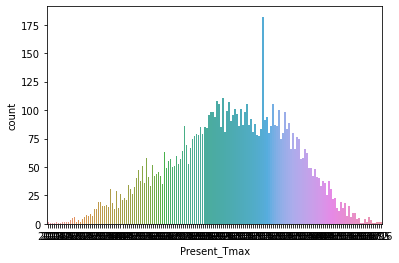

In [14]:
sns.countplot(x="Present_Tmax",data=df)

# Bi-Variate Analysis

<AxesSubplot:xlabel='Present_Tmax', ylabel='Month'>

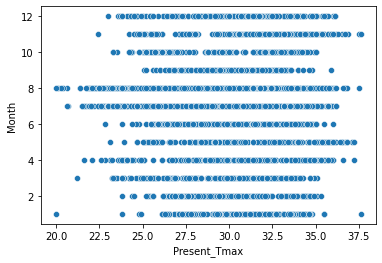

In [16]:
sns.scatterplot(x="Present_Tmax",y="Month",data=df)

As we can see from the above plot, max temp is in the 11th and 8th month i.e November and August respectively which is 37.5 degree celcius

<AxesSubplot:xlabel='Present_Tmin', ylabel='Month'>

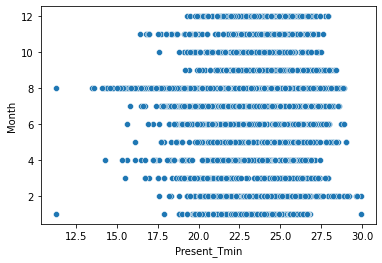

In [17]:
sns.scatterplot(x="Present_Tmin",y="Month",data=df)

As we can see from the above plot, min temp is in the and 8th month i.e in the month of August which is less than 12.5 degree celcius

<AxesSubplot:xlabel='Next_Tmax', ylabel='Year'>

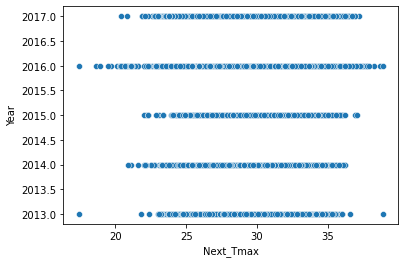

In [18]:
sns.scatterplot(x="Next_Tmax",y="Year",data=df)

nt_max temp is 38 degree celcius in the year of 2016

<AxesSubplot:xlabel='Next_Tmin', ylabel='Year'>

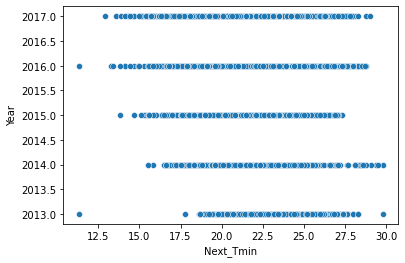

In [19]:
sns.scatterplot(x="Next_Tmin",y="Year",data=df)

net_min temp is 11.3 degree celcius in the year of 2016

# So 2016 is the Hottest and the coolest year among all the year

In [20]:
print(df["Next_Tmax"].max())
print(df["Next_Tmin"].min())

38.9
11.3


In [21]:
df[["Next_Tmax","Year"]][:10]

,Next_Tmax,Year
0,29.1,2013
1,30.5,2013
2,31.1,2013
3,31.7,2013
4,31.2,2013
5,31.5,2013
6,30.9,2013
7,31.1,2013
8,31.3,2013
9,30.5,2013


In [22]:
df[["Next_Tmin","Year"]][:10]

,Next_Tmin,Year
0,21.2,2013
1,22.5,2013
2,23.9,2013
3,24.3,2013
4,22.5,2013
5,24.0,2013
6,23.4,2013
7,22.9,2013
8,21.6,2013
9,21.0,2013


In [23]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

<AxesSubplot:ylabel='Solar radiation'>

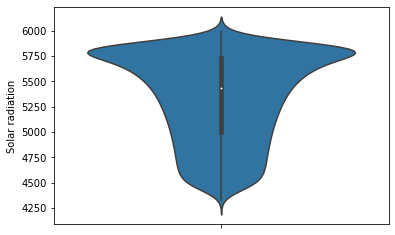

In [24]:
sns.violinplot(y="Solar radiation",data=df)

As we can see from the plot that maximum solar radiation is in 5000 to 5750 and the maximum is 6000 and the min is 4250

In [25]:
cor=df.corr()
cor

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.111707,0.131483,-0.064828,-0.154365,0.064331,0.097898,0.004152,-0.130618,0.006658,...,-0.237467,-0.118603,-0.256138,-0.090461,-0.018814,0.108569,0.128390,0.000488,0.001165,0.000607
Present_Tmax,0.111707,1.000000,0.619221,-0.214998,-0.305792,0.501246,0.554768,-0.132777,0.116041,-0.318215,...,-0.053099,0.008635,-0.187098,-0.106605,-0.024943,0.608681,0.621846,-0.143403,-0.001063,0.062187
Present_Tmin,0.131483,0.619221,1.000000,0.090367,-0.059385,0.384882,0.666980,-0.056793,-0.035814,0.066901,...,-0.078764,-0.043659,-0.250294,-0.146821,0.053823,0.470941,0.796333,-0.107832,-0.002749,0.039150
LDAPS_RHmin,-0.064828,-0.214998,0.090367,1.000000,0.611314,-0.419389,0.167924,0.325582,-0.015007,0.623117,...,0.084541,-0.073998,0.099121,0.120115,0.248989,-0.454425,0.070956,-0.073457,-0.065734,-0.002051
LDAPS_RHmax,-0.154365,-0.305792,-0.059385,0.611314,1.000000,-0.182835,0.036238,0.193008,0.296986,0.452374,...,0.181629,0.023808,0.164355,0.203716,0.157210,-0.308550,-0.100040,-0.026499,-0.056923,-0.131126
LDAPS_Tmax_lapse,0.064331,0.501246,0.384882,-0.419389,-0.182835,1.000000,0.700427,-0.215284,0.124012,-0.352365,...,-0.039079,0.084176,-0.166084,-0.150705,0.063188,0.723211,0.511372,-0.163376,-0.040339,0.015174
LDAPS_Tmin_lapse,0.097898,0.554768,0.666980,0.167924,0.036238,0.700427,1.000000,-0.051714,-0.044372,0.059542,...,-0.089752,-0.024898,-0.182240,-0.173282,0.167306,0.503437,0.788360,-0.180012,-0.045173,-0.004160
LDAPS_WS,0.004152,-0.132777,-0.056793,0.325582,0.193008,-0.215284,-0.051714,1.000000,0.046855,0.307226,...,0.036014,-0.058423,0.187704,0.168621,0.128987,-0.359371,-0.111450,-0.036697,-0.091778,-0.110251
LDAPS_LH,-0.130618,0.116041,-0.035814,-0.015007,0.296986,0.124012,-0.044372,0.046855,1.000000,-0.112777,...,0.130056,0.025208,0.053829,0.084725,-0.035381,0.127318,-0.073270,-0.020696,-0.034940,0.055302
LDAPS_CC1,0.006658,-0.318215,0.066901,0.623117,0.452374,-0.352365,0.059542,0.307226,-0.112777,1.000000,...,-0.008054,-0.006779,-0.013954,-0.020553,0.223127,-0.465100,-0.022926,-0.025488,-0.083364,-0.065999


<AxesSubplot:>

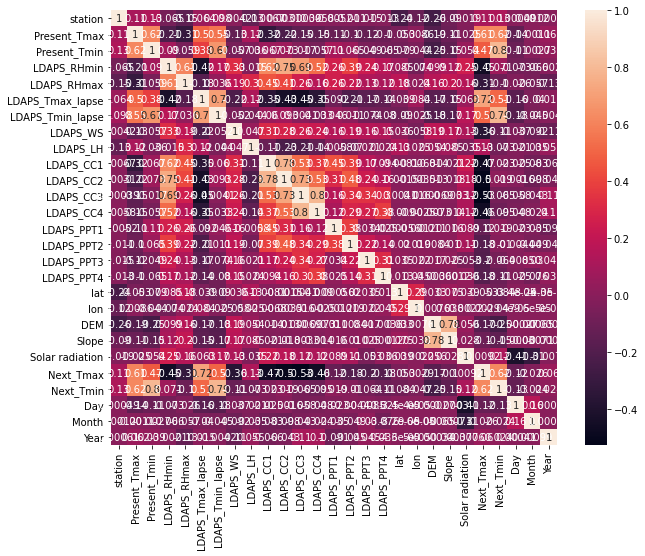

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

# EDA

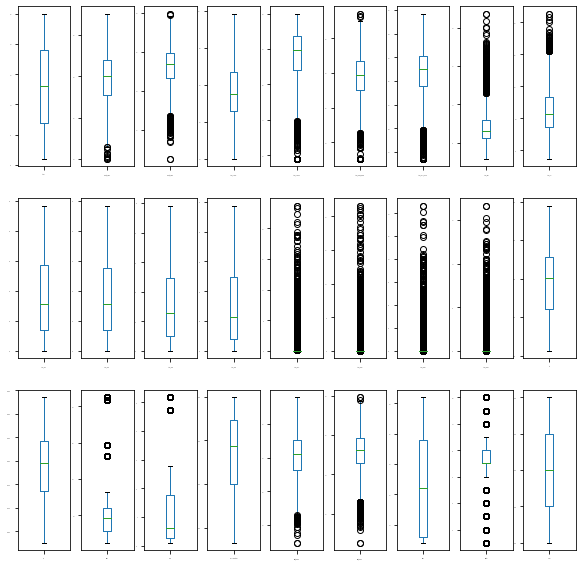

In [27]:
df.plot(kind="box",subplots=True,layout=(3,9),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

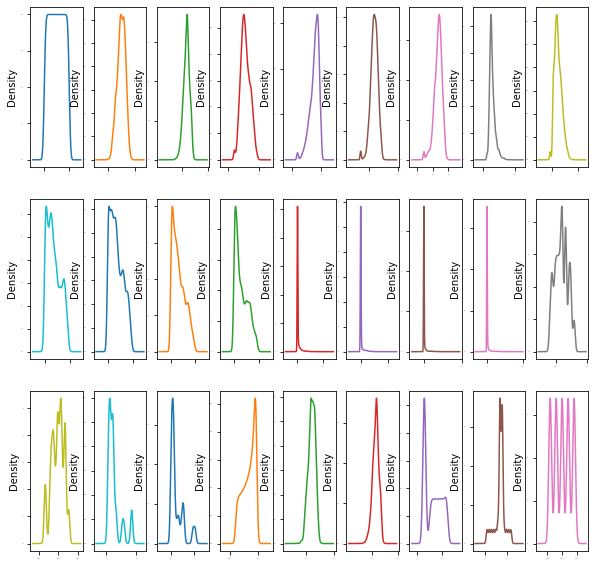

In [28]:
df.plot(kind="density",subplots=True,layout=(3,9),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

In [29]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df_new=df[~((df < (Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]

In [30]:
df_new.shape

(2394, 27)

In [31]:
df.shape

(7752, 27)

In [32]:
loss_percentage=(7752-2394)/7752*100
print(loss_percentage)

69.11764705882352


In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66329184, 0.36581161, 0.76208695, ..., 1.65407929, 0.48171757,
        1.41366644],
       [1.52464842, 0.71512575, 0.67889224, ..., 1.65407929, 0.48171757,
        1.41366644],
       [1.38600499, 0.61378787, 0.02826281, ..., 1.65407929, 0.48171757,
        1.41366644],
       ...,
       [1.66415031, 2.2236727 , 2.42598117, ..., 1.65407929, 0.41111557,
        1.41439608],
       [1.66329184, 3.30461006, 4.96341987, ..., 1.13680677, 2.71380044,
        1.41366644],
       [1.66329184, 2.64054542, 2.77368828, ..., 1.13680677, 2.71380044,
        1.41366644]])

In [34]:
thresold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [35]:
df_new=df[(z<3).all(axis=1)]

In [36]:
df_new.shape

(6871, 27)

In [37]:
loss_percentage=(7752-6871)/7752*100
print(loss_percentage)

11.364809081527348


In [38]:
df.skew()

station             0.000100
Present_Tmax       -0.276483
Present_Tmin       -0.375457
LDAPS_RHmin         0.202176
LDAPS_RHmax        -1.109283
LDAPS_Tmax_lapse   -0.601161
LDAPS_Tmin_lapse   -0.851245
LDAPS_WS            1.485885
LDAPS_LH            0.586176
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.336871
Next_Tmin          -0.406685
Day                 0.245892
Month              -0.706382
Year                0.000365
dtype: float64

In [39]:
x=df.drop(["Next_Tmax","Next_Tmin"],axis=1)
y=df[["Next_Tmax","Next_Tmin"]]

In [40]:
from sklearn.preprocessing import power_transform
df1=power_transform(x)
df1=pd.DataFrame(df1,columns=x.columns)

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Finding The Best Random State

In [46]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAucc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    le=LinearRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.7714564458869819 on random_state 9


# Creating Train Test Split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=9)

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.7714564458869819
      Next_Tmax  Next_Tmin
978        32.7       28.3
5144       32.7       23.0
4818       29.5       18.7
4433       31.5       21.4
5714       35.3       26.5
...         ...        ...
3446       31.1       21.0
7094       35.3       26.6
614        30.2       22.0
803        29.7       24.9
7554       29.3       23.5

[2326 rows x 2 columns]
[[32.99298563 27.21137118]
 [31.30527604 21.77602456]
 [27.43717254 20.33322174]
 ...
 [30.12016027 23.34230417]
 [30.68891805 24.46259271]
 [27.30437941 22.86380576]]


In [49]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.9030509324131514
      Next_Tmax  Next_Tmin
978        32.7       28.3
5144       32.7       23.0
4818       29.5       18.7
4433       31.5       21.4
5714       35.3       26.5
...         ...        ...
3446       31.1       21.0
7094       35.3       26.6
614        30.2       22.0
803        29.7       24.9
7554       29.3       23.5

[2326 rows x 2 columns]
[[33.125 27.014]
 [31.05  22.209]
 [28.433 19.52 ]
 ...
 [30.208 22.593]
 [29.616 23.557]
 [28.754 23.536]]


In [52]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.8700003241669305
      Next_Tmax  Next_Tmin
978        32.7       28.3
5144       32.7       23.0
4818       29.5       18.7
4433       31.5       21.4
5714       35.3       26.5
...         ...        ...
3446       31.1       21.0
7094       35.3       26.6
614        30.2       22.0
803        29.7       24.9
7554       29.3       23.5

[2326 rows x 2 columns]
[[32.84 26.84]
 [32.68 22.56]
 [28.8  20.  ]
 ...
 [31.22 23.16]
 [29.94 24.86]
 [28.9  23.76]]


In [53]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(r2_score(y_test,pred))
print(y_test)
print(pred)

0.7712356182779059
      Next_Tmax  Next_Tmin
978        32.7       28.3
5144       32.7       23.0
4818       29.5       18.7
4433       31.5       21.4
5714       35.3       26.5
...         ...        ...
3446       31.1       21.0
7094       35.3       26.6
614        30.2       22.0
803        29.7       24.9
7554       29.3       23.5

[2326 rows x 2 columns]
[[32.2 27.5]
 [31.8 22.5]
 [29.  21.2]
 ...
 [30.1 23. ]
 [30.  24.1]
 [28.3 23.8]]


In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score of Logistic Regression",scr.mean()) 

Cross validation Score of Logistic Regression 0.6567668349734495


In [56]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation Score of Random Forest Classifier",scr.mean())

Cross validation Score of Random Forest Classifier 0.7026685935114878


In [59]:
scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation Score of Kneighbors Classifier",scr.mean())

Cross validation Score of Kneighbors Classifier 0.5319454583163061


In [60]:
scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation Score of Decision Tree Regressor",scr.mean())

Cross validation Score of Decision Tree Regressor 0.3837813994121536


As the minimum Difference is 12 with Linear Regression, will do Hyper parameter tuning with this only

# Hyper Parameter Tuning With Linear Regression

In [61]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters={"n_jobs":(2,4,6,8,10,12),
           "fit_intercept":["True"],
           "normalize":["False"]}
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'fit_intercept': 'True', 'n_jobs': 2, 'normalize': 'False'}

In [65]:
lr_mod=LinearRegression(fit_intercept="True",n_jobs=2,normalize="False")

lr_mod.fit(x_train,y_train)
pred=lr_mod.predict(x_test)
print(r2_score(y_test,pred)*100)
print(y_test)
print(pred)

77.14564458869823
      Next_Tmax  Next_Tmin
978        32.7       28.3
5144       32.7       23.0
4818       29.5       18.7
4433       31.5       21.4
5714       35.3       26.5
...         ...        ...
3446       31.1       21.0
7094       35.3       26.6
614        30.2       22.0
803        29.7       24.9
7554       29.3       23.5

[2326 rows x 2 columns]
[[32.99298563 27.21137118]
 [31.30527604 21.77602456]
 [27.43717254 20.33322174]
 ...
 [30.12016027 23.34230417]
 [30.68891805 24.46259271]
 [27.30437941 22.86380576]]


# Saving The Model

In [66]:
import joblib
joblib.dump(lr_mod,"Temp.pkl")

['Temp.pkl']